In [ ]:
import numpy as np
import matplotlib.pyplot as plt

'Load and analyze the provided data file------------'

# Load the data from the text file
data = np.loadtxt(r'.\data\testData.txt')

# Extract the sampling times and data values from the data
sampling_times = data[:, 0]
data_values = data[:, 1]

# Calculate the sampling frequency
duration = sampling_times[-1] - sampling_times[0] 
n_samples = len(sampling_times)
fs = (n_samples-1) / duration  # Sampling frequency
# Print the information about the data
print(f"Sampling Frequency: {fs:.2f} Hz")
print(f"Duration: {duration:.2f} seconds")
print(f"Number of Samples: {n_samples}")

Sampling Frequency: 1024.00 Hz
Duration: 16.00 seconds
Number of Samples: 16384


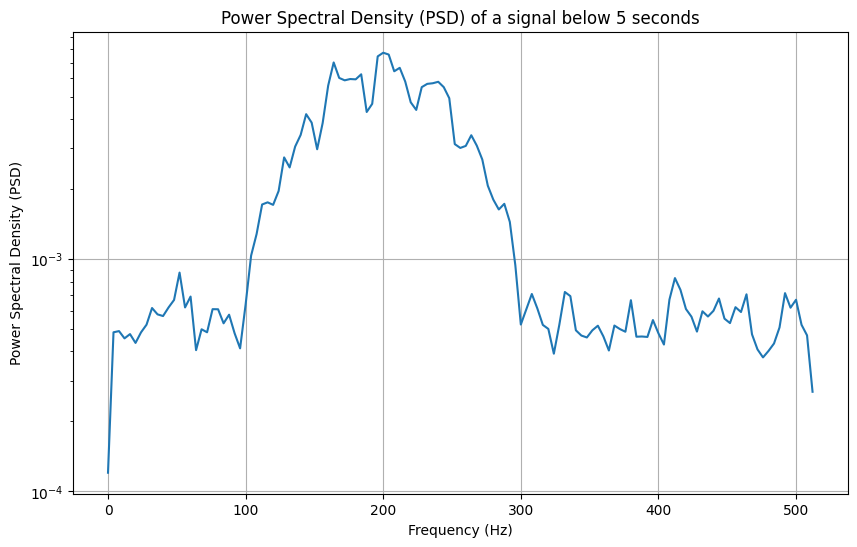

In [4]:
from scipy import signal

'whitening function using a two-sided PSD------------'

def whitening(freq_vec, psd_vec,signal_vec,samp_freq):#the filter using a two-sided PSD
    
    # Design FIR filter with T(f) = square root of target PSD
    sqrt_psd = np.sqrt(psd_vec)

    # Design FIR filter using firwin2
    fltr_order=500 
    b = signal.firwin2(fltr_order + 1, freq_vec, 1/sqrt_psd, fs=samp_freq)
    
    # Pass through the designed filter and scale
    output = signal.fftconvolve(signal_vec,b, mode='same')

    return output


'Estimate the PSD of noise with using a signal below 5 seconds------------'

for i in range(len(sampling_times)):
    if sampling_times[i] >5:
        index_5sec= i
        break

# Estimate the PSD using Welch's method
f, pxx = signal.welch(data_values[:index_5sec], fs, nperseg=256)

# Plot the estimated PSD
plt.figure(figsize=(10, 6))
plt.semilogy(f, pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.title('Power Spectral Density (PSD) of a signal below 5 seconds')
plt.grid(True)
plt.show()

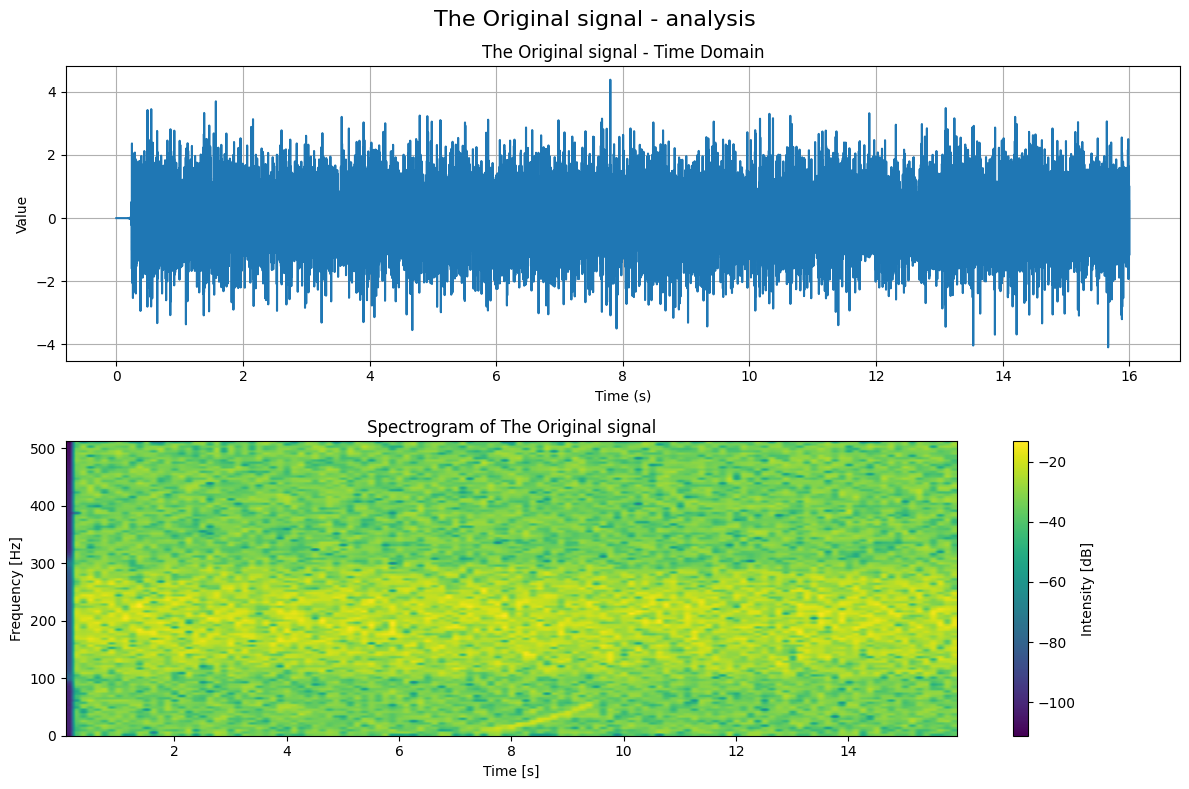

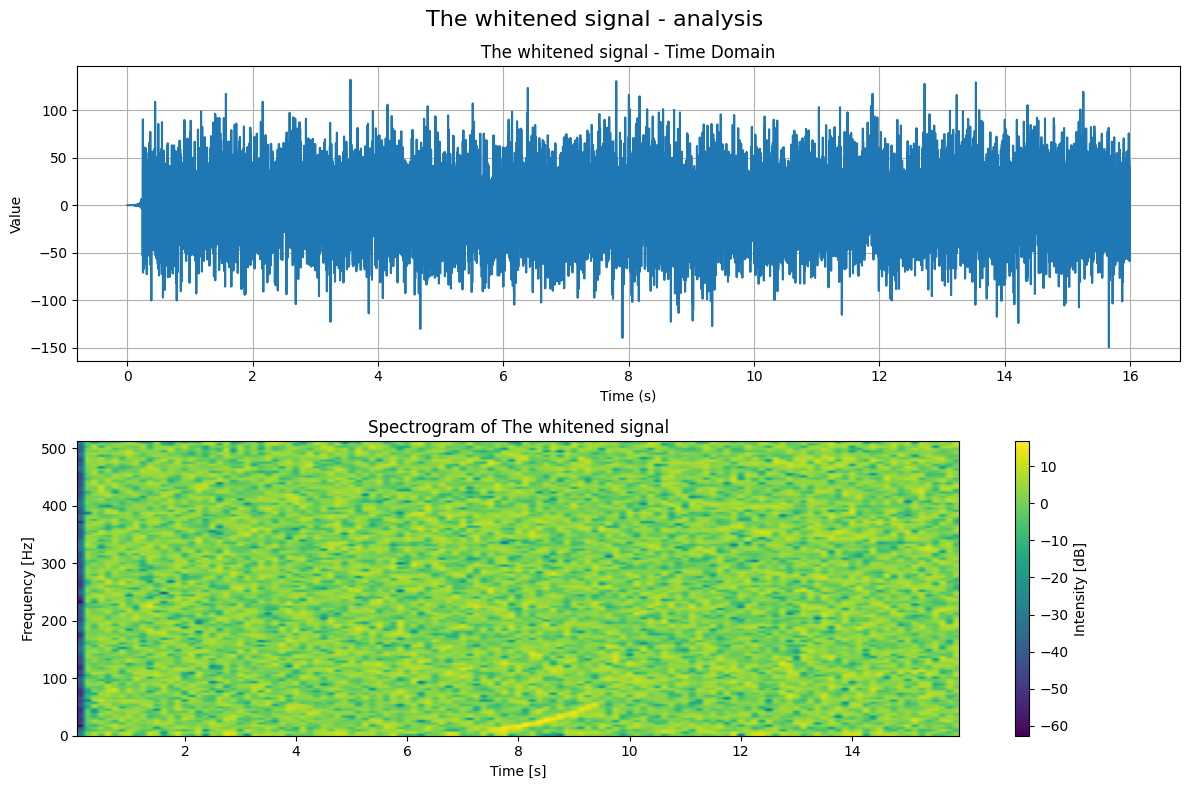

In [5]:

'Whitening the entire signal and comparing it with the original------------'

def plot(time_vec, signal_vec, fs,signalname):

    plt.figure(figsize=(12, 8))
    plt.suptitle(f'{signalname} - analysis', fontsize=16)

    # Plot the time-domain signal
    plt.subplot(2, 1, 1)
    plt.plot(time_vec, signal_vec, markersize=3)
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.title(f'{signalname} - Time Domain')
    plt.grid(True)

    # Plot the spectrogram
    plt.subplot(2, 1, 2)
    plt.specgram(signal_vec, NFFT=256, Fs=fs, noverlap=128, cmap='viridis')
    plt.colorbar(label='Intensity [dB]')
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.title(f'Spectrogram of {signalname}')

    plt.tight_layout()
    plt.show()


#Apply the whitening filter to the entire signal
whitenedsignal=whitening(f, pxx/2,data_values,fs)

#Plot the original signal and the whitened signal
plot(sampling_times, data_values, fs,'The Original signal')
plot(sampling_times, whitenedsignal, fs,'The whitened signal')
